In [2]:
print("hi")

hi


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

C:\Users\chott\AppData\Local\Temp\ipykernel_15656\1075886533.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
customer = pd.read_csv("Customers.csv")
product = pd.read_csv("Products.csv")
transaction = pd.read_csv("Transactions.csv")

In [5]:
type(customer) , type(product) , type(transaction)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [6]:
customer_columns = customer.columns.tolist()
product_columns = product.columns.tolist()
transaction_columns = transaction.columns.tolist()

print("Customer Columns:", customer_columns)
print("Product Columns:", product_columns)
print("Transaction Columns:", transaction_columns)

Customer Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Product Columns: ['ProductID', 'ProductName', 'Category', 'Price']
Transaction Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']


In [7]:
len(customer) , len(product) , len(transaction)

(200, 100, 1000)

In [8]:
def check_format(df):
    format_counts = {}
    for column in df.columns:
        format_counts[column] = df[column].apply(type).value_counts().to_dict()
    return pd.DataFrame(format_counts).fillna(0).astype(int)

customer_format = check_format(customer)
product_format = check_format(product)
transaction_format = check_format(transaction)

print("Customer Format:\n", customer_format)
print("Product Format:\n", product_format)
print("Transaction Format:\n", transaction_format)

Customer Format:
                CustomerID  CustomerName  Region  SignupDate
<class 'str'>         200           200     200         200
Product Format:
                  ProductID  ProductName  Category  Price
<class 'str'>          100          100       100      0
<class 'float'>          0            0         0    100
Transaction Format:
                  TransactionID  CustomerID  ProductID  TransactionDate  \
<class 'str'>             1000        1000       1000             1000   
<class 'int'>                0           0          0                0   
<class 'float'>              0           0          0                0   

                 Quantity  TotalValue  Price  
<class 'str'>           0           0      0  
<class 'int'>        1000           0      0  
<class 'float'>         0        1000   1000  


In [9]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


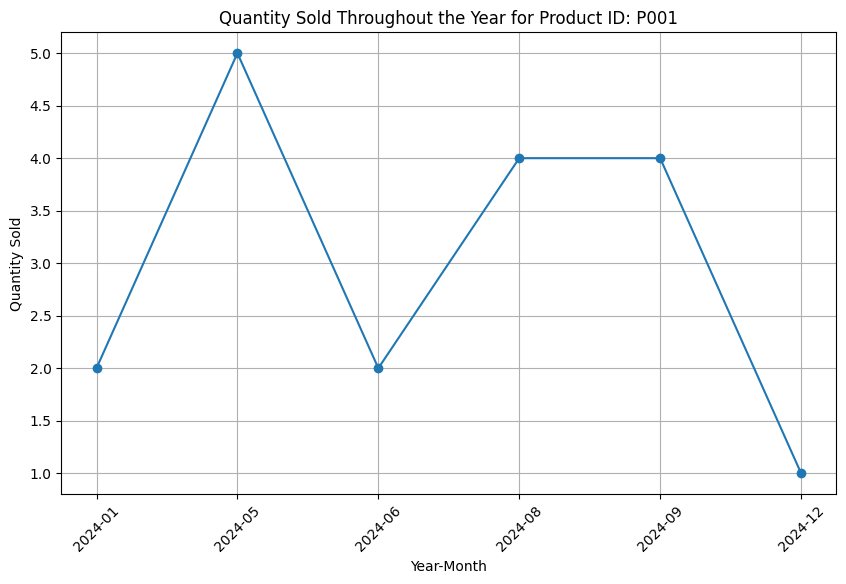

In [13]:
# Convert TransactionDate to datetime
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])

# Extract year and month from TransactionDate
transaction['YearMonth'] = transaction['TransactionDate'].dt.to_period('M')

# Group by ProductID and YearMonth, and sum the quantities
product_monthly_quantity = transaction.groupby(['ProductID', 'YearMonth'])['Quantity'].sum().reset_index()

# Plot the data for each product
unique_products = product_monthly_quantity['ProductID'].unique()

for product_id in unique_products:
    product_data = product_monthly_quantity[product_monthly_quantity['ProductID'] == product_id]
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['YearMonth'].astype(str), product_data['Quantity'], marker='o')
    plt.title(f'Quantity Sold Throughout the Year for Product ID: {product_id}')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    break

### we analyze the sales of different products over the year but the results were inconclusive as the variation is not much as number of sales for induvidal product is quite small

In [14]:
print("Hi")

Hi


```markdown
### Checking the Variation of Product Sales over year

To analyze the variation in product sales, we can examine the monthly sales data for each product. By plotting the quantity sold over time for each product, we can identify trends and patterns in the sales data. This analysis will help us understand the performance of different products and make informed business decisions.

We have already grouped the transaction data by `ProductID` and `YearMonth`, and summed the quantities sold. The resulting dataframe `product_monthly_quantity` contains the monthly sales data for each product.

Next, we will plot the sales data for each product to visualize the variation in sales over time.
```

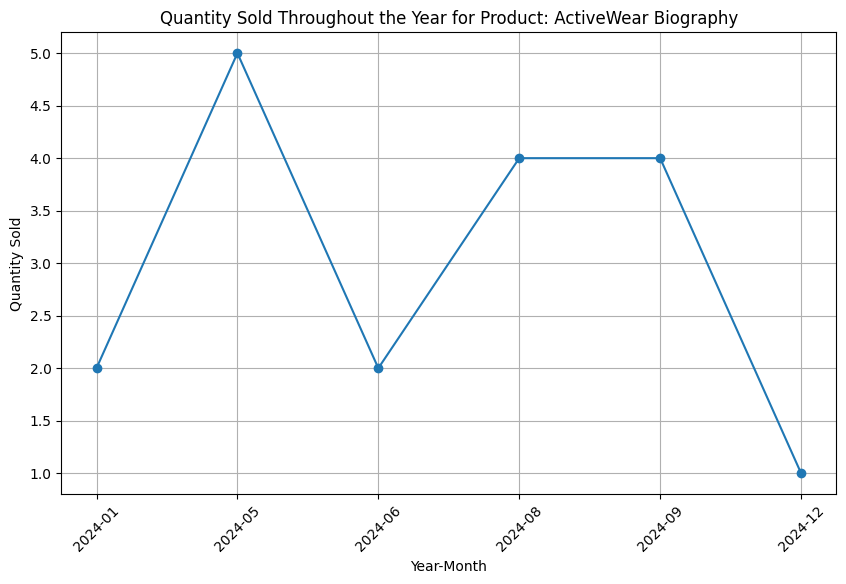

In [16]:
# Merge transaction table with product table to get ProductName
transaction_with_product_name = transaction.merge(product[['ProductID', 'ProductName']], on='ProductID', how='left')

# Group by ProductName and YearMonth, and sum the quantities
product_name_monthly_quantity = transaction_with_product_name.groupby(['ProductName', 'YearMonth'])['Quantity'].sum().reset_index()

# Plot the data for each product
unique_product_names = product_name_monthly_quantity['ProductName'].unique()

for product_name in unique_product_names:
    product_data = product_name_monthly_quantity[product_name_monthly_quantity['ProductName'] == product_name]
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['YearMonth'].astype(str), product_data['Quantity'], marker='o')
    plt.title(f'Quantity Sold Throughout the Year for Product: {product_name}')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    break

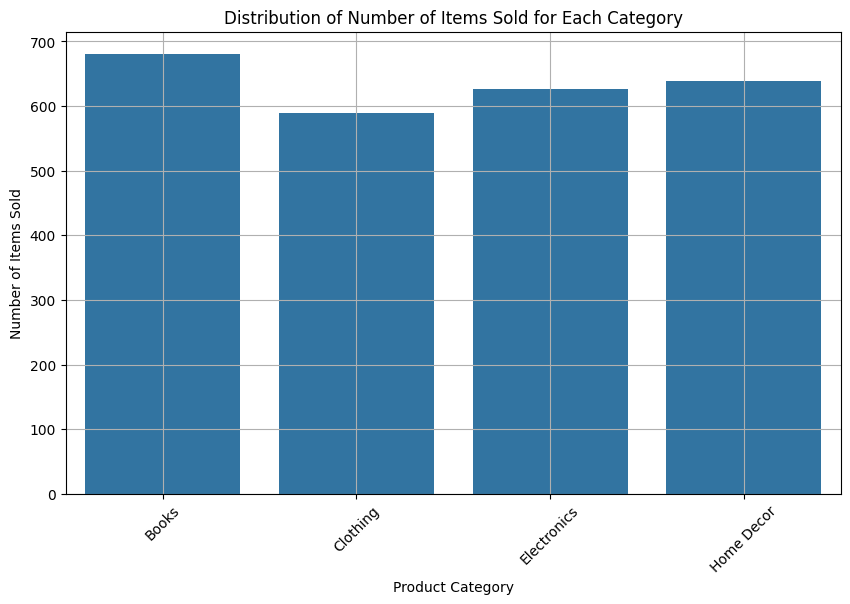

In [17]:
# Merge transaction table with product table to get ProductCategory
transaction_with_category = transaction.merge(product[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Category and sum the quantities
category_quantity = transaction_with_category.groupby('Category')['Quantity'].sum().reset_index()

# Plot the distribution of number of items sold for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Quantity', data=category_quantity)
plt.title('Distribution of Number of Items Sold for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


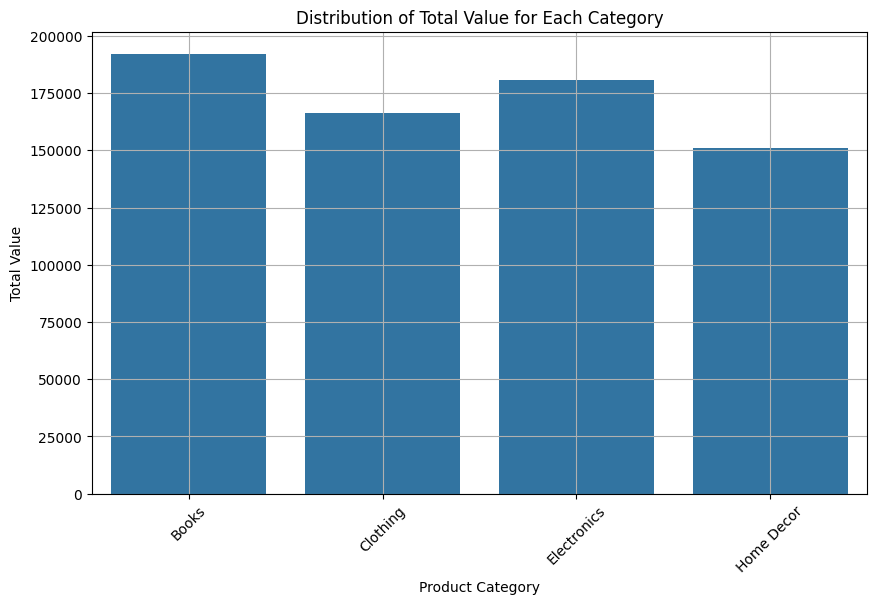

In [18]:
# Group by Category and sum the total values
category_total_value = transaction_with_category.groupby('Category')['TotalValue'].sum().reset_index()

# Plot the distribution of total value for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='TotalValue', data=category_total_value)
plt.title('Distribution of Total Value for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

show the contribution of number of sales of individual products is quite proportional to the amount of total value
I was expecting the contribution from electronincs as they are usually expensive

In [20]:
# Calculate mean, median, and standard deviation for Quantity, TotalValue, and Price by Category
category_stats = transaction_with_category.groupby('Category').agg({
    'Quantity': ['mean', 'median', 'std'],
    'TotalValue': ['mean', 'median', 'std'],
    'Price': ['mean', 'median', 'std']
}).reset_index()

# Flatten the MultiIndex columns
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns.values]

# Rename columns for better readability
category_stats.rename(columns={
    'Category_': 'Category',
    'Quantity_mean': 'Quantity_Mean',
    'Quantity_median': 'Quantity_Median',
    'Quantity_std': 'Quantity_StdDev',
    'TotalValue_mean': 'TotalValue_Mean',
    'TotalValue_median': 'TotalValue_Median',
    'TotalValue_std': 'TotalValue_StdDev',
    'Price_mean': 'Price_Mean',
    'Price_median': 'Price_Median',
    'Price_std': 'Price_StdDev'
}, inplace=True)

print("Category Statistics:")
print(category_stats)

Category Statistics:
      Category  Quantity_Mean  Quantity_Median  Quantity_StdDev  \
0        Books       2.522222              2.0         1.113230   
1     Clothing       2.587719              3.0         1.159610   
2  Electronics       2.468504              2.0         1.080272   
3   Home Decor       2.576613              3.0         1.124883   

   TotalValue_Mean  TotalValue_Median  TotalValue_StdDev  Price_Mean  \
0       711.657296             502.83         541.489862  280.526222   
1       728.818684             606.70         523.450442  283.104254   
2       711.746063             635.72         471.804756  288.722008   
3       608.443266             477.99         418.783376  237.616250   

   Price_Median  Price_StdDev  
0        337.22    155.478253  
1        303.50    145.097284  
2        300.68    134.323072  
3        235.58    119.525374  


###  Price Analysis

The median price of electronics, books, and other items is quite similar. This indicates that despite the varying categories, the central tendency of the prices remains consistent across different product types. 

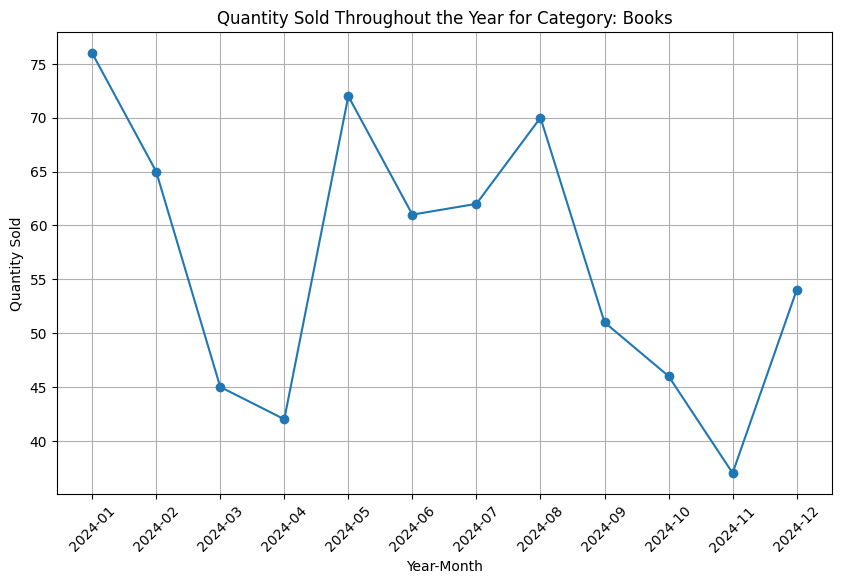

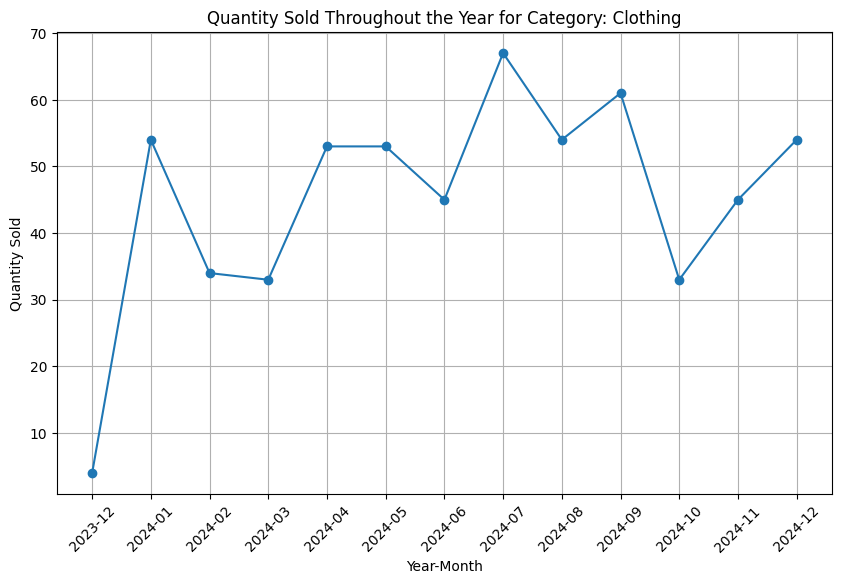

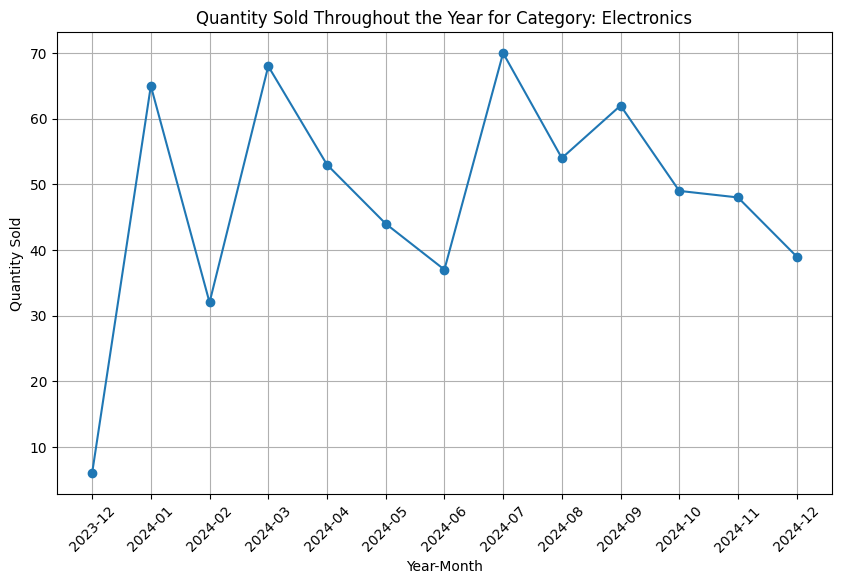

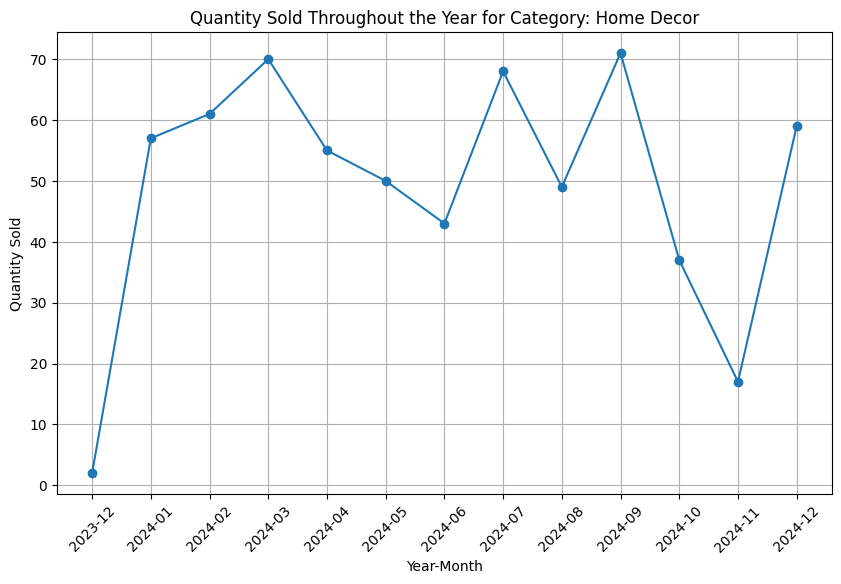

In [38]:
# Group by Category and YearMonth, and sum the quantities
category_monthly_sales = transaction_with_category.groupby(['Category', 'YearMonth'])['Quantity'].sum().reset_index()

# Plot the data for each category
unique_categories = category_monthly_sales['Category'].unique()

for category in unique_categories:
    category_data = category_monthly_sales[category_monthly_sales['Category'] == category]
    plt.figure(figsize=(10, 6))
    plt.plot(category_data['YearMonth'].astype(str), category_data['Quantity'], marker='o')
    plt.title(f'Quantity Sold Throughout the Year for Category: {category}')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

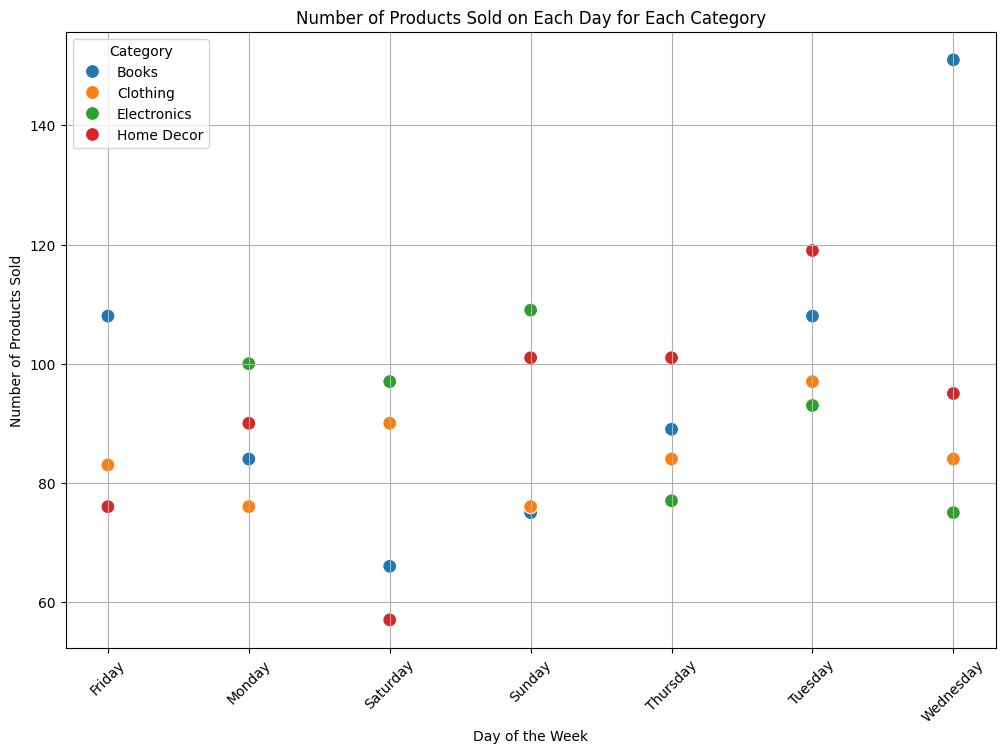

In [46]:
# Add a new column 'DayOfWeek' to the transaction dataframe
transaction['DayOfWeek'] = transaction['TransactionDate'].dt.day_name()

# Replace ProductID with Category
transaction_with_category = transaction.merge(product[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Category and DayOfWeek, and sum the quantities
category_day_sales = transaction_with_category.groupby(['Category', 'DayOfWeek'])['Quantity'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=category_day_sales, x='DayOfWeek', y='Quantity', hue='Category', s=100)
plt.title('Number of Products Sold on Each Day for Each Category')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [47]:
# Merge transaction table with customer table on CustomerID
transaction_with_customer = transaction.merge(customer, on='CustomerID', how='left')

# Merge the resulting table with product table on ProductID
transaction_full = transaction_with_customer.merge(product, on='ProductID', how='left')

# Display the first few rows of the new table
transaction_full.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,DayOfWeek,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,Sunday,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,Monday,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,Thursday,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,Tuesday,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,Thursday,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


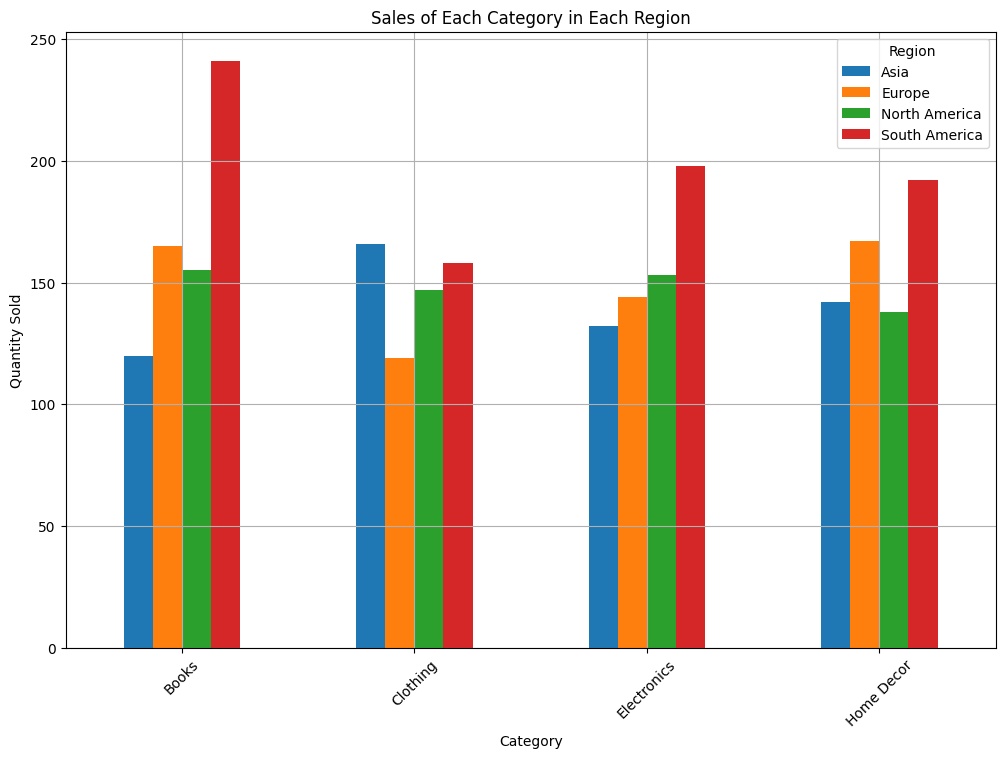

In [67]:
# Create a pivot table to compare sales of each category in each region
category_region_sales = transaction_full.pivot_table(
    index='Category', 
    columns='Region', 
    values='Quantity', 
    aggfunc='sum'
).fillna(0)

# Plot the pivot table
category_region_sales.plot(kind='bar', figsize=(12, 8))
plt.title('Sales of Each Category in Each Region')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [65]:
transaction_full.columns.tolist()

['TransactionID',
 'CustomerID',
 'ProductID',
 'TransactionDate',
 'Quantity',
 'TotalValue',
 'Price_x',
 'YearMonth',
 'DayOfWeek',
 'CustomerName',
 'Region',
 'SignupDate',
 'ProductName',
 'Category',
 'Price_y']

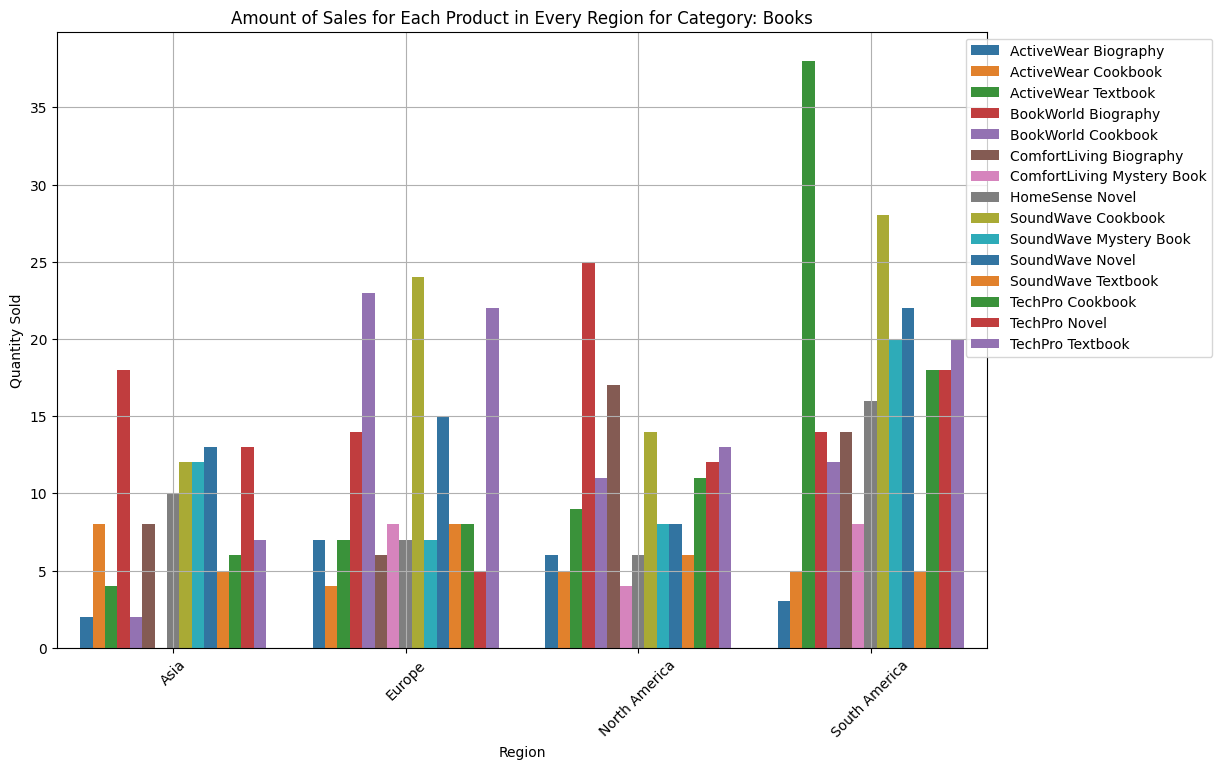

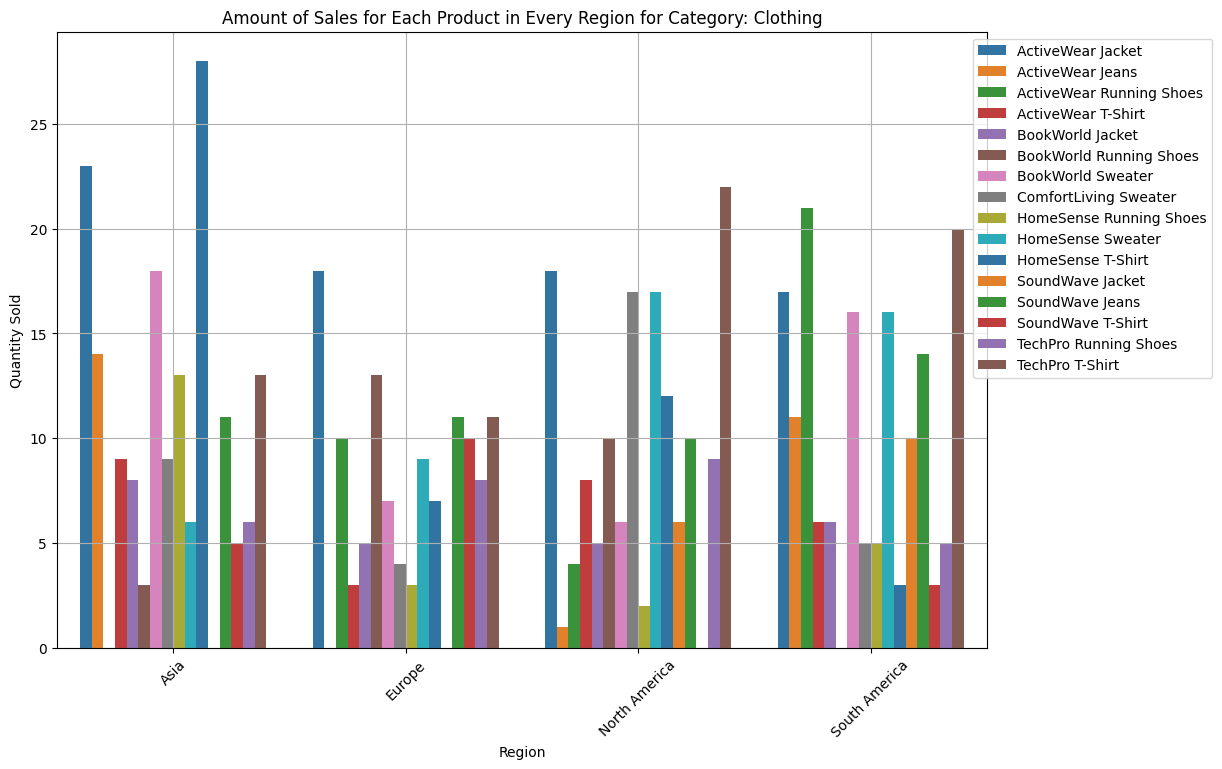

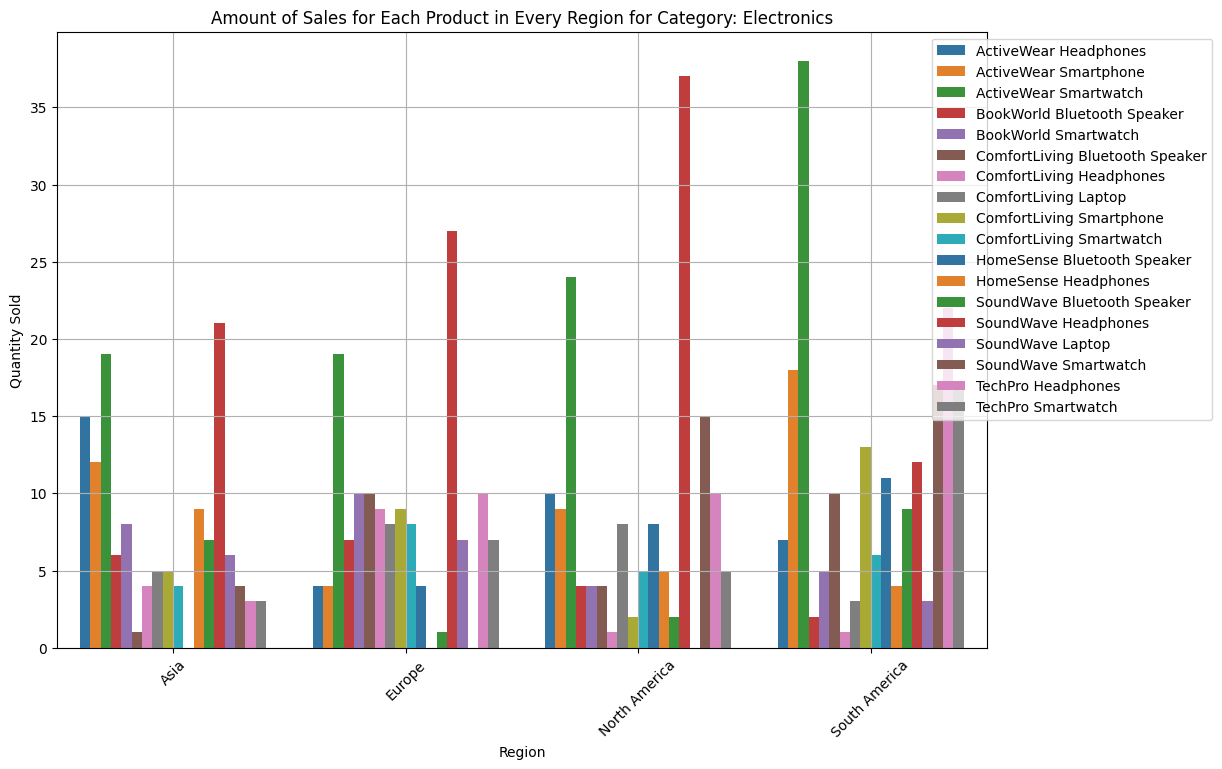

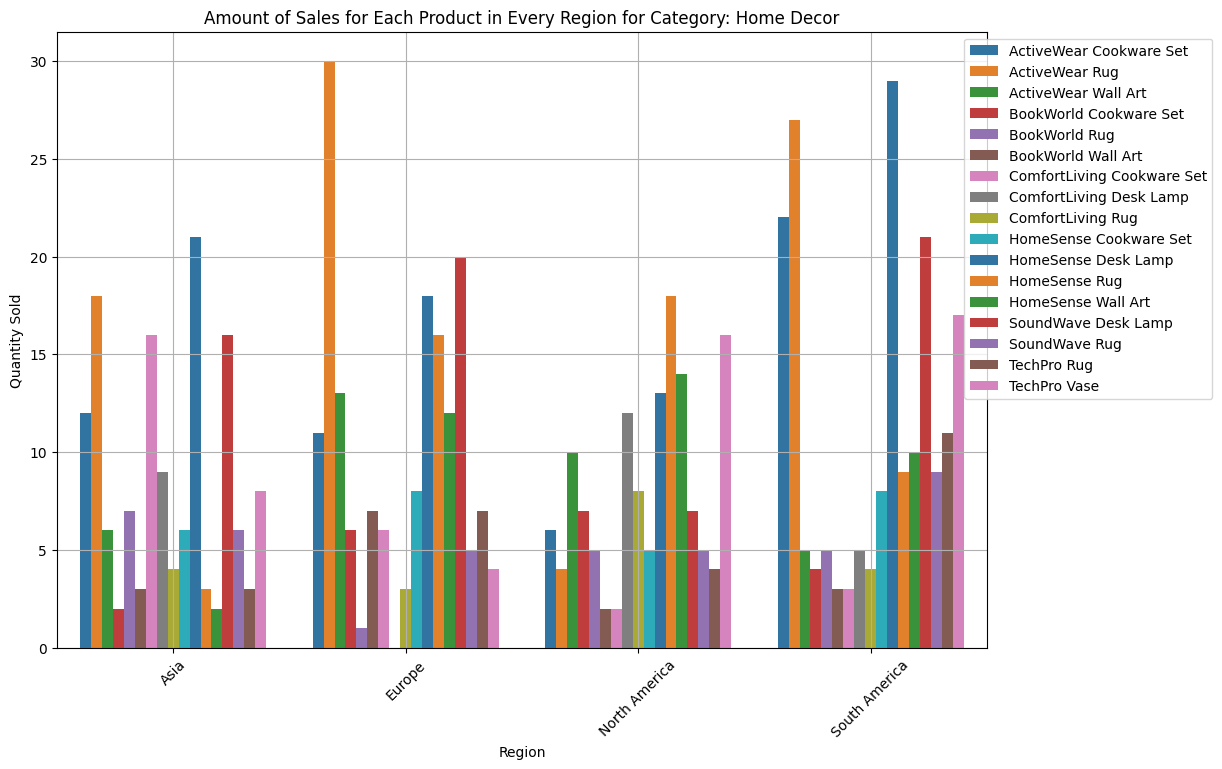

In [72]:
# Group by Category and Region, and sum the quantities
# Group by Category, ProductName, and Region, and sum the quantities
category_product_region_sales = transaction_full.groupby(['Category', 'ProductName', 'Region'])['Quantity'].sum().reset_index()
# Set a color palette with high contrast colors
high_contrast_palette = sns.color_palette("tab10", n_colors=len(unique_product_names))
sns.set_palette(high_contrast_palette)
# Get unique categories
unique_categories = category_product_region_sales['Category'].unique()

# Plot the data for each category
for category in unique_categories:
    category_data = category_product_region_sales[category_product_region_sales['Category'] == category]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Region', y='Quantity', hue='ProductName', data=category_data)
    plt.title(f'Amount of Sales for Each Product in Every Region for Category: {category}')
    plt.xlabel('Region')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.show()
category_region_sales = transaction_full.groupby(['ProductName', 'Region'])['Quantity'].sum().reset_index()


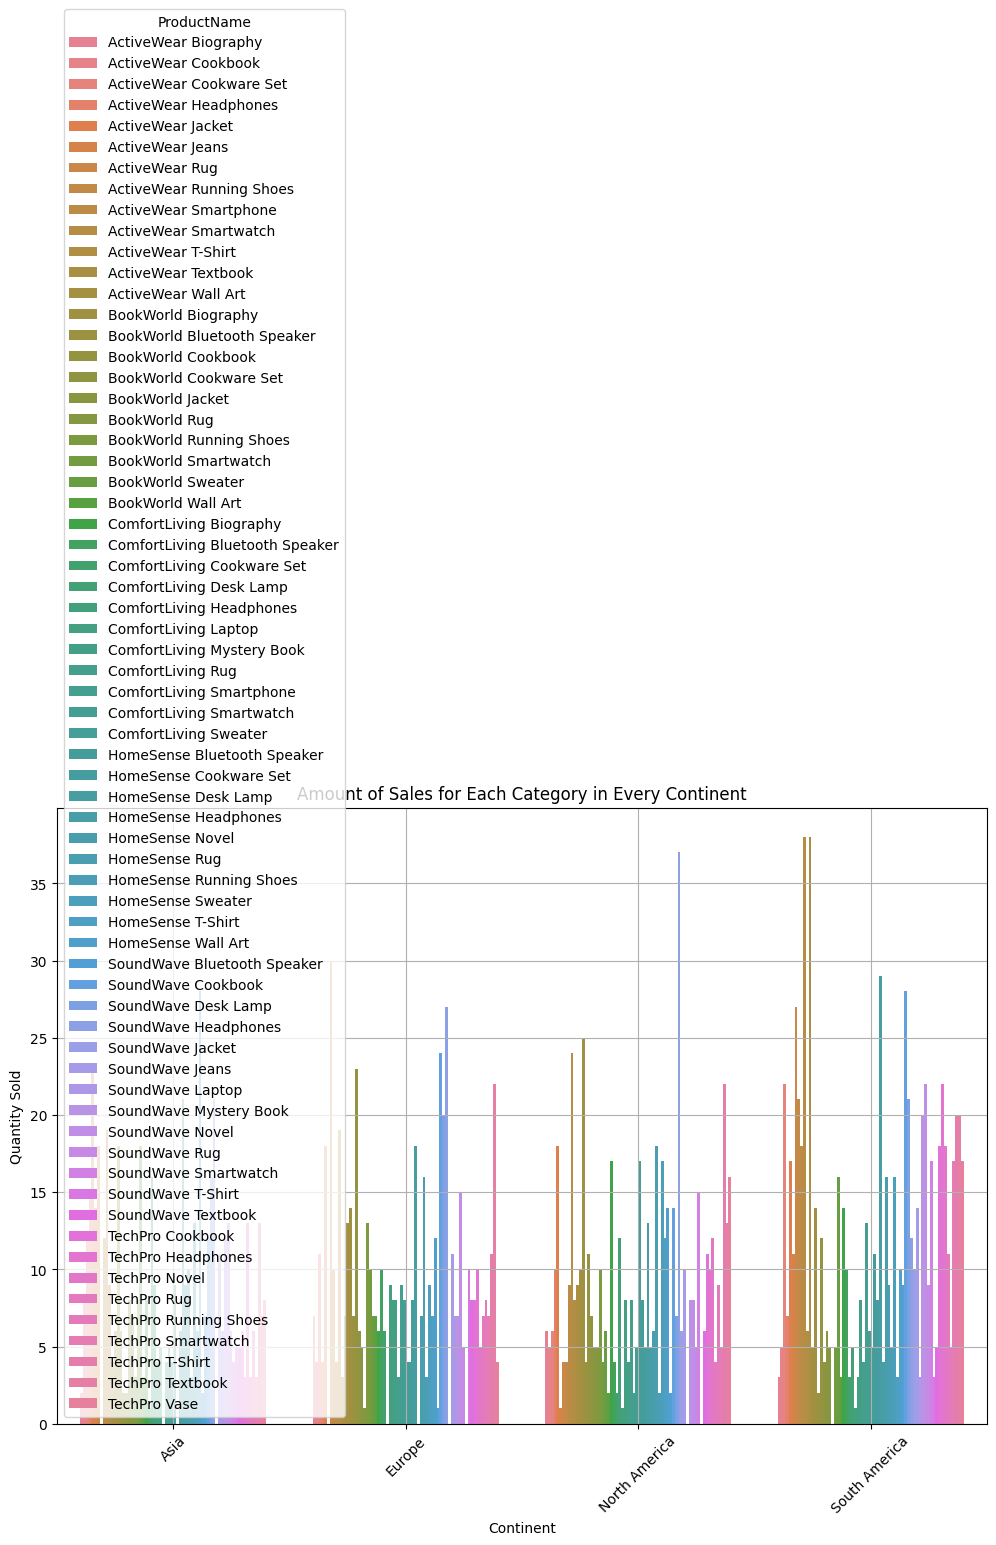

In [70]:
# Group by Category and Region, and sum the quantities
category_region_sales = transaction_full.groupby(['ProductName', 'Region'])['Quantity'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Quantity', hue='ProductName', data=category_region_sales)
plt.title('Amount of Sales for Each Category in Every Continent')
plt.xlabel('Continent')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [73]:
# Create a new table days_trsn from transaction_full
days_trsn = transaction_full.copy()

# Add an additional column for the day of the week the product was purchased
days_trsn['DayOfWeekShort'] = days_trsn['TransactionDate'].dt.strftime('%a')

# Display the first few rows of the new table
days_trsn.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,YearMonth,DayOfWeek,CustomerName,Region,SignupDate,ProductName,Category,Price_y,DayOfWeekShort
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,Sunday,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,Sun
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,Monday,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Mon
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,Thursday,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,Thu
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,Tuesday,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,Tue
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,Thursday,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,Thu


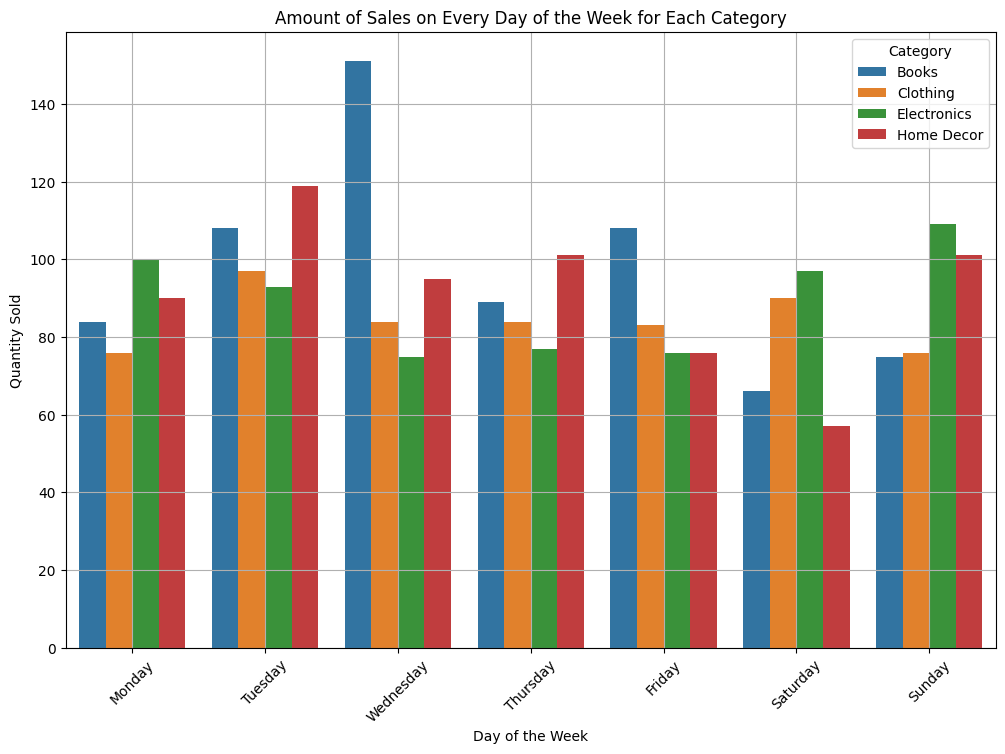

In [75]:
# Group by DayOfWeek and sum the quantities
# Group by DayOfWeek and Category, and sum the quantities
day_of_week_category_sales = transaction_with_category.groupby(['DayOfWeek', 'Category'])['Quantity'].sum().reset_index()

# Sort the days of the week in the correct order
day_of_week_category_sales['DayOfWeek'] = pd.Categorical(day_of_week_category_sales['DayOfWeek'], 
                                                         categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                                         ordered=True)
day_of_week_category_sales = day_of_week_category_sales.sort_values('DayOfWeek')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='DayOfWeek', y='Quantity', hue='Category', data=day_of_week_category_sales)
plt.title('Amount of Sales on Every Day of the Week for Each Category')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

List numbe of home decorators are sold on saturday indicatin people celebrating weeken outside

salse is books is highest on wednesday

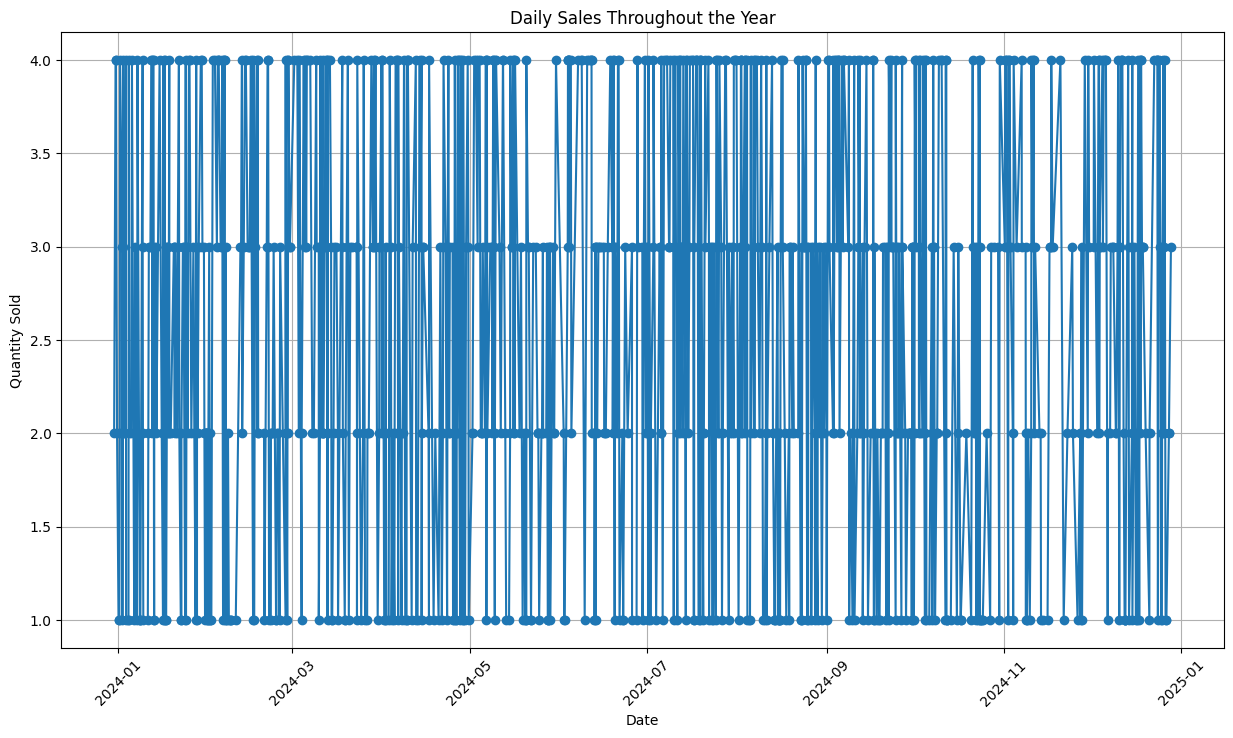

In [76]:
# Group by TransactionDate and sum the quantities
daily_sales = transaction.groupby('TransactionDate')['Quantity'].sum().reset_index()

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(daily_sales['TransactionDate'], daily_sales['Quantity'], marker='o')
plt.title('Daily Sales Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

the salse data is cossistent throught the year raise bit supession like the data is probebly ususlly we may see asharp jump and dip on some special occeatin like chrismes

# Task 2: Lookalike Model